In [28]:
#imports
import pandas as pd
import numpy as np

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
%matplotlib inline

In [31]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)

In [32]:
housing_df = california_housing.frame

In [33]:
housing_df['MedHouseVal'] = 100000*housing_df['MedHouseVal']

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MedHouseVal', ylabel='Density'>

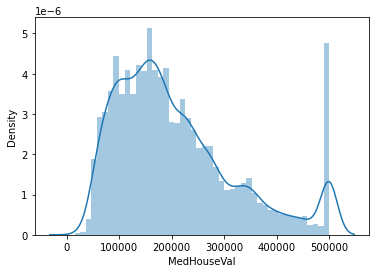

In [34]:
sns.distplot(housing_df['MedHouseVal'])

<AxesSubplot:>

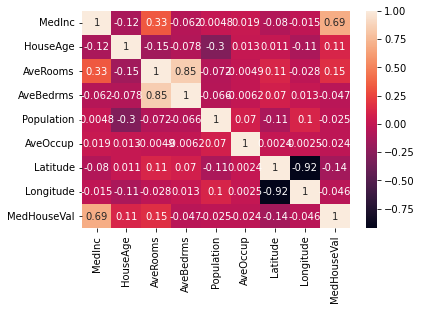

In [35]:
sns.heatmap(housing_df.corr(), annot=True)

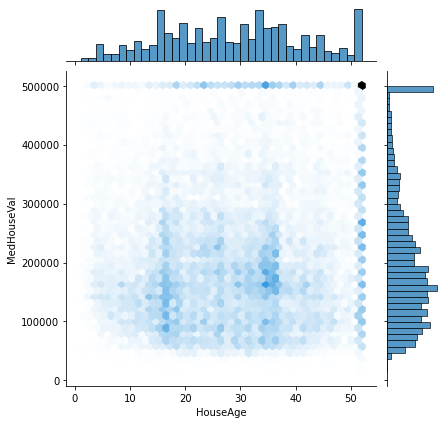

In [36]:
sns.jointplot(x='HouseAge',y='MedHouseVal',data=housing_df,kind='hex')

In [37]:
housing_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [38]:
X = housing_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]
y = housing_df['MedHouseVal']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [43]:
print(lm.intercept_)

-3717595.9351331117


In [44]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
MedInc,44039.884679
HouseAge,941.750760
AveRooms,-11649.906993
AveBedrms,75310.485501
Population,0.005681
AveOccup,-428.018095
Latitude,-42550.782348
Longitude,-43696.807593


In [45]:
predictions = lm.predict(X_test)

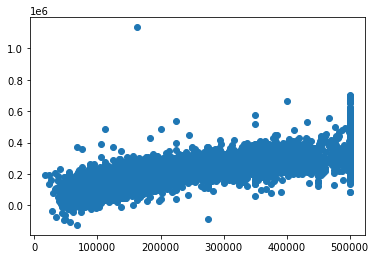

In [64]:
plt.scatter(y_test,predictions)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MedHouseVal', ylabel='Density'>

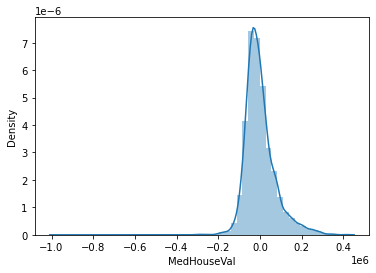

In [61]:
sns.distplot((y_test-predictions))

In [62]:
from sklearn import metrics

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 53079.81652409564
MSE: 5375475600.247601
RMSE: 73317.63498809547
